In [1]:
#basic lib imports
import pandas as pd
import os.path as path
import numpy as np

#sklearn imports (model lib)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit, train_test_split

#plotting lib
import matplotlib.pyplot as plt

Matplotlib created a temporary cache directory at /tmp/matplotlib-048np_d0 because the default path (/home/caiouehara/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


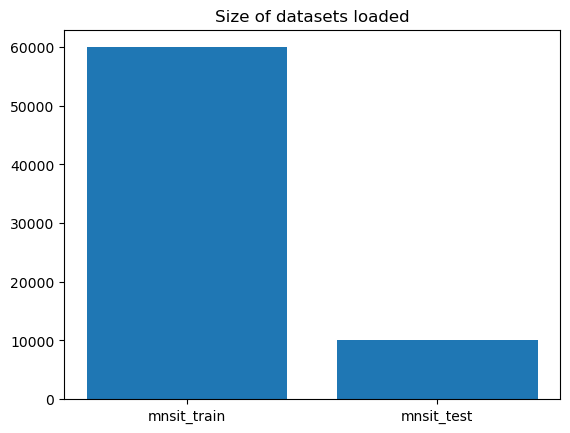

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [2]:
#loading datasets
data_train = pd.read_csv(path.relpath("../data/mnist_train.csv"), header=None)
data_test = pd.read_csv(path.relpath("../data/mnist_test.csv"), header=None)

#plotting for checking loading
fig, ax = plt.subplots()

datasets_names = ("mnsit_train", "mnsit_test")
counts = (len(data_train), len(data_test))
ax.bar(datasets_names, counts)
ax.set_title('Size of datasets loaded')

plt.show()
data_train.describe()

In [4]:
#Set train X and Y values
X_train = np.array(data_train.loc[:, 1:].values)
Y_train = np.array(data_train.loc[:, 0].values)

#Gaussian Naive Bayes SciKit Model
gnb = GaussianNB()
classifier = gnb.fit(X_train, Y_train)

In [5]:
#Set test X and Y values5
X_test = np.array(data_test.loc[:, 1:].values)
Y_test = np.array(data_test.loc[:, 0].values)

#Create predicit results with tests
y_pred = classifier.predict(X_test)

- Números de classes preditas de forma errada
4442 de 10000

- Matriz de confusão:
[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168    7   63    7  210  497]
 [  71   25    1   20    3   44   40    2  586  100]
 [  12   12    3    1    1    7  895    0   26    1]
 [   0   15    2   10    5    1    5  280   39  671]
 [  13   72    3    7    3   11   12    4  648  201]
 [   5    7    3    6    1    0    1   13   18  955]] 

- Índices da classificação:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.

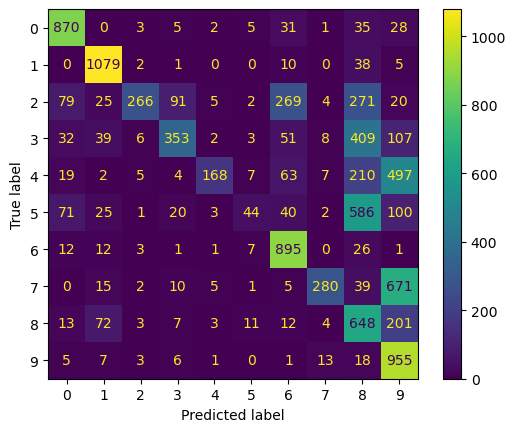

In [6]:
#Analyze results
def analyze(Y_test, y_pred):
    print("- Números de classes preditas de forma errada")
    print("%d de %d\n" % ((Y_test != y_pred).sum(), X_test.shape[0]))

    print("- Matriz de confusão:")
    c_matrix = confusion_matrix(Y_test, y_pred, labels=np.array([0,1,2,3,4,5,6,7,8,9]) )
    print(c_matrix, "\n")

    print("- Índices da classificação:")
    print(classification_report(Y_test, y_pred))

    print("- Taxa de erro da classificação por classe:")
    k = 0
    e_matrix = [] #matriz da taxa de erro
    for i in c_matrix:
        rights = i[k]
        total = i.sum()
        e_matrix.append( 100 * ( (total - rights)/total) )
        k += 1
        
    for i in range(0, len(e_matrix)):
        print(f"A taxa de erro da classe {str(i)}: {str(e_matrix[i])}%")
        
    disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=gnb.classes_)
    disp.plot()
analyze(Y_test, y_pred)

In [7]:
#Applying probability Calibration

X_clf_train, X_cfl_validation, y_cfl_train, y_cfl_validation = train_test_split(X_train, Y_train, test_size = 0.3)

calibrated_clf = CalibratedClassifierCV(gnb, cv=3)
calibrated_clf.fit(X_clf_train, y_cfl_train)
calibrated_clf.predict_proba(X_clf_train)[:2, :]



array([[0.00686894, 0.62854646, 0.05831286, 0.0517707 , 0.06760012,
        0.0695942 , 0.006523  , 0.06355   , 0.04102068, 0.00621303],
       [0.01141451, 0.01040062, 0.09692033, 0.08633956, 0.11242096,
        0.11574252, 0.01084105, 0.10566678, 0.43992654, 0.01032712]])

In [8]:
y_pred_clf = calibrated_clf.predict(X_cfl_validation)

- Números de classes preditas de forma errada
7803 de 10000

- Matriz de confusão:
[[1616    4    9    5    5    5   35    3   32   17]
 [   1 1879    2   13    0    2   20    2   42   22]
 [ 209   57  558  153    6    7  406    7  354   26]
 [ 190  106   18  796    2    1   79   12  470  220]
 [  65   13   21    7  361   11  156    2  278  813]
 [ 289   52    7   43   13  100  102    5  881  185]
 [  35   46   11    2    2    6 1686    0   25    1]
 [  12   10    3   23   22    1    4  532   40 1236]
 [  48  277    7   17    3    5   31    1 1039  341]
 [  14   18    5    5   11    0    1   36   19 1630]] 

- Índices da classificação:
              precision    recall  f1-score   support

           0       0.65      0.93      0.77      1731
           1       0.76      0.95      0.85      1983
           2       0.87      0.31      0.46      1783
           3       0.75      0.42      0.54      1894
           4       0.85      0.21      0.34      1727
           5       0.72      0.

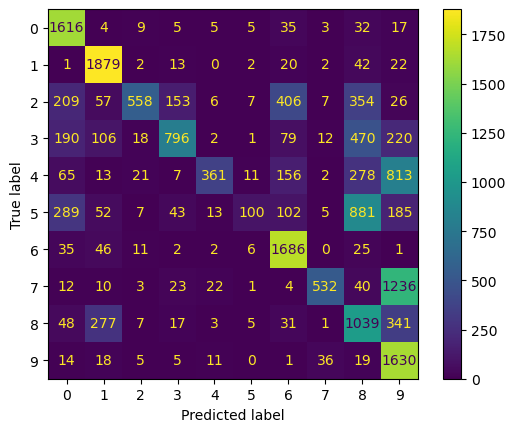

In [9]:
analyze(y_cfl_validation, y_pred_clf)